In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [27]:
movies=[]
movies=pd.read_csv("C:\\Users\\User-PC\\Desktop\\Data Science\\Data Science Assignment\\18 Association Rules\\my_movies.csv",sep=",")
movies = movies.iloc[:,[0,1,2,3,4]]
movies

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,NaN,NaN
2,LOTR1,LOTR2,NaN,NaN,NaN
3,Gladiator,Patriot,Sixth Sense,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN
5,Gladiator,Patriot,Sixth Sense,NaN,NaN
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN
7,Gladiator,Patriot,NaN,NaN,NaN
8,Gladiator,Patriot,Sixth Sense,NaN,NaN
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN


In [28]:
#### to convert the nan values to 0's##
movies.iloc[:,2:5] = movies.iloc[:,2:5].apply(lambda x:x.fillna(0))

In [29]:
movies

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,0,0
2,LOTR1,LOTR2,0,0,0
3,Gladiator,Patriot,Sixth Sense,0,0
4,Gladiator,Patriot,Sixth Sense,0,0
5,Gladiator,Patriot,Sixth Sense,0,0
6,Harry Potter1,Harry Potter2,0,0,0
7,Gladiator,Patriot,0,0,0
8,Gladiator,Patriot,Sixth Sense,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,0


In [30]:
## Get dummy variables

X = pd.get_dummies(movies[['V1','V2','V3','V4','V5']])

In [32]:
X

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_0,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_0,V4_Green Mile,V5_0,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1
1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
6,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
7,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
9,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0


In [34]:
x_dummies = X.iloc[:,[9,14,16]]
x_dummies

,V3_0,V4_0,V5_0
0,0,0,0
1,0,1,1
2,1,1,1
3,0,1,1
4,0,1,1
5,0,1,1
6,1,1,1
7,1,1,1
8,0,1,1
9,0,0,1


In [35]:
### Running Apriori algorithm
##With support=0,005 and max_len=2
frequent_items = apriori(x_dummies,min_support = 0.005, max_len =2 , use_colnames = True )
frequent_items.sort_values('support', ascending = False, inplace = True)

In [36]:
## Building rules
## with min_threshold =1
rules_dummies = association_rules(frequent_items, metric = 'lift', min_threshold = 1)
rules_dummies.sort_values('lift',ascending =False,inplace =True)

In [37]:
## Build models with Nan Values first

In [38]:
## Eliminating redundancies
def to_list(i):
    return(sorted(i))
    
rules_add = rules_dummies.antecedents.apply(to_list) + rules_dummies.consequents.apply(to_list)

rules_add = rules_add.apply(sorted)

rules_set = list(rules_add)

In [39]:
unique_rules = [list(m) for m in set(tuple(i) for i in rules_set)]
index_rules = []

In [40]:
for i in unique_rules:
    index_rules.append(rules_set.index(i))

In [42]:
index_rules

[4, 0, 2]

In [43]:
### rules without redudancy##
rules_without_redud = rules_dummies.iloc[index_rules,:]

In [44]:
### sorting
rules_without_redud.sort_values('lift', ascending = False, inplace =True)

<ipython-input-44-39f57e7323cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_without_redud.sort_values('lift', ascending = False, inplace =True)


In [45]:
### Support and confidence
Support = rules_without_redud['support']
confidence = rules_without_redud['confidence']

Text(0, 0.5, 'Confidence')

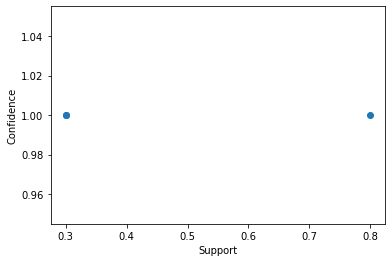

In [46]:
## plotting support & Confidence

import matplotlib.pyplot as plt

plt.scatter(Support,confidence);plt.xlabel("Support");plt.ylabel("Confidence")

In [47]:
## Creating models with other than Nan / zero values

x_without_dum = X.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,15,17]]

In [48]:
#### Applying Apriori with support = 0.005 and max length =2
frequents_item1 = apriori(x_without_dum, min_support=0.005, max_len = 2, use_colnames=True)
frequents_item1.sort_values('support',ascending = False, inplace = True)


In [49]:
###Building rules with minimum threshold = 1
rules_without = association_rules(frequents_item1, metric='lift', min_threshold =1)
rules_without.sort_values('lift',ascending = False, inplace =True)

In [50]:
### Eliminate the redundancy####
def to_list_out(i):
    return(sorted(i))

In [51]:
rules_out_add = rules_without.antecedents.apply(to_list_out)+rules_without.consequents.apply(to_list_out)

rules_out_add = rules_out_add.apply(sorted)
rules_set_out = list(rules_out_add)

In [52]:
##unique values
unique_values_out = [list(n) for n in set(tuple(i) for i in rules_set_out)]
index_rules_out=[]
for i in unique_values_out:
    index_rules_out.append(rules_set_out.index(i))


In [53]:
## rules without redundancy
rules_without_out = rules_without.iloc[index_rules_out,:]

In [55]:
## Sorting
rules_without_out.sort_values('lift', ascending= False, inplace =True)

<ipython-input-55-7775e0a88b65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_without_out.sort_values('lift', ascending= False, inplace =True)


In [56]:
Support_out = rules_without_out["support"]
Confidence_out = rules_without_out["confidence"]
lift = rules_without_out["lift"]

In [57]:
#### Plotting 3D plot for support, confidence and lift
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'lift')

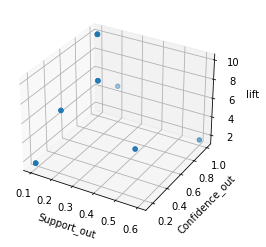

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(Support_out, Confidence_out, lift)
ax.set_xlabel("Support_out")
ax.set_ylabel("Confidence_out")
ax.set_zlabel("lift")

In [59]:
#### scatter plot for rules for support, confidence and lift
import matplotlib.pyplot as plt
import scipy as sp

Text(0, 0.5, 'Confidence')

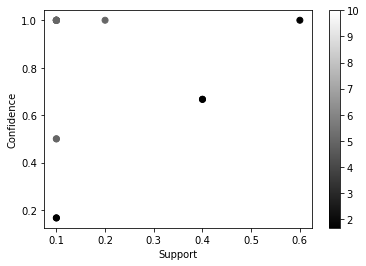

In [60]:
plt.scatter(Support_out, Confidence_out,c= lift,cmap='gray')
plt.colorbar()
plt.xlabel("Support")
plt.ylabel("Confidence")